In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


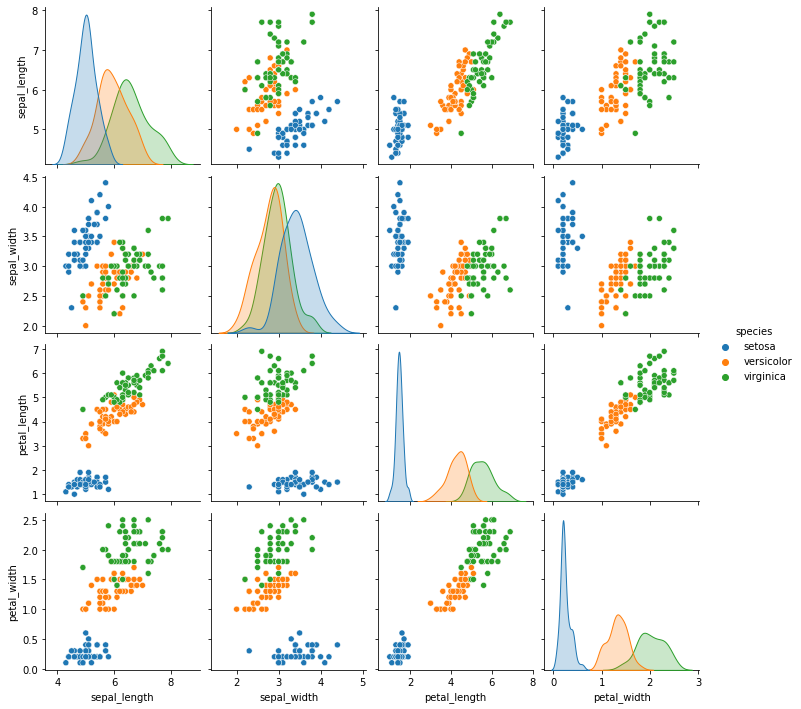

In [6]:
sns.pairplot(df, hue='species');

In [14]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(150, 4) (150,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

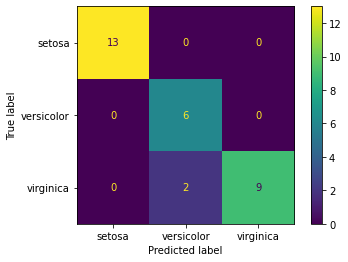

In [25]:
plot_confusion_matrix(model, X_test, y_test)

In [21]:
accuracy_score(y_test, yhat)

0.9333333333333333

In [22]:
confusion_matrix(y_test, yhat)

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  2,  9]], dtype=int64)

In [23]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.75      1.00      0.86         6
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



In [26]:
from sklearn import tree

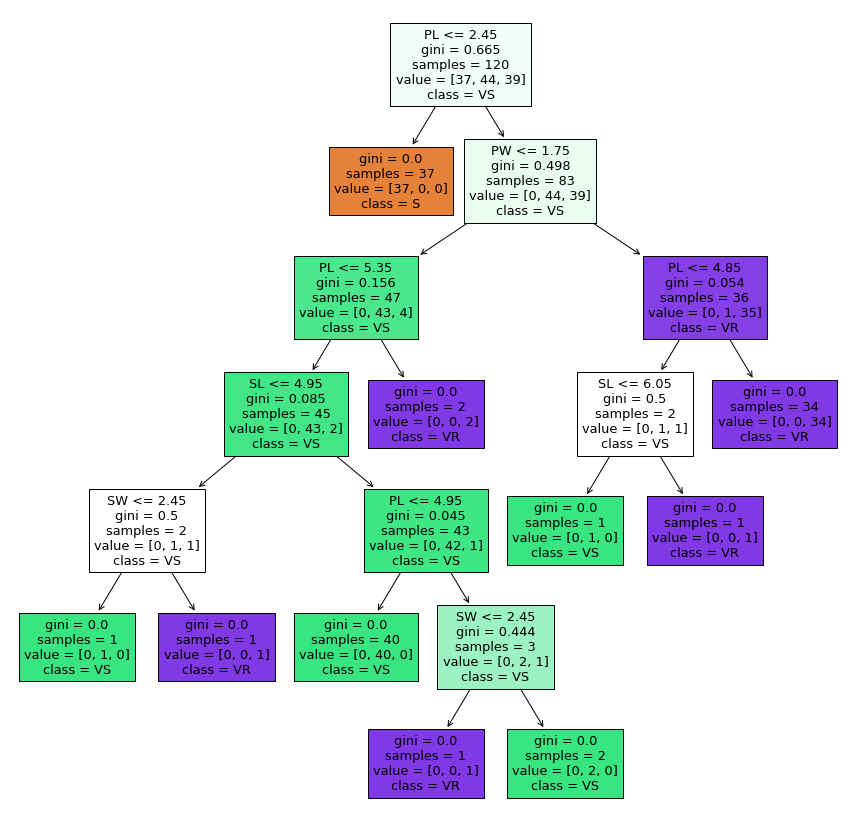

In [32]:
plt.figure(figsize=(15,15))
cols = ['SL', 'SW', 'PL','PW']
cat_names =['S', 'VS', 'VR']
tree.plot_tree(model, 
              feature_names = cols,
              class_names = cat_names,
              filled=True);

In [30]:
# Gini index at root node
1-(37/120)**2 - (44/120)**2 - (39/120)**2

0.6648611111111112

In [41]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [42]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



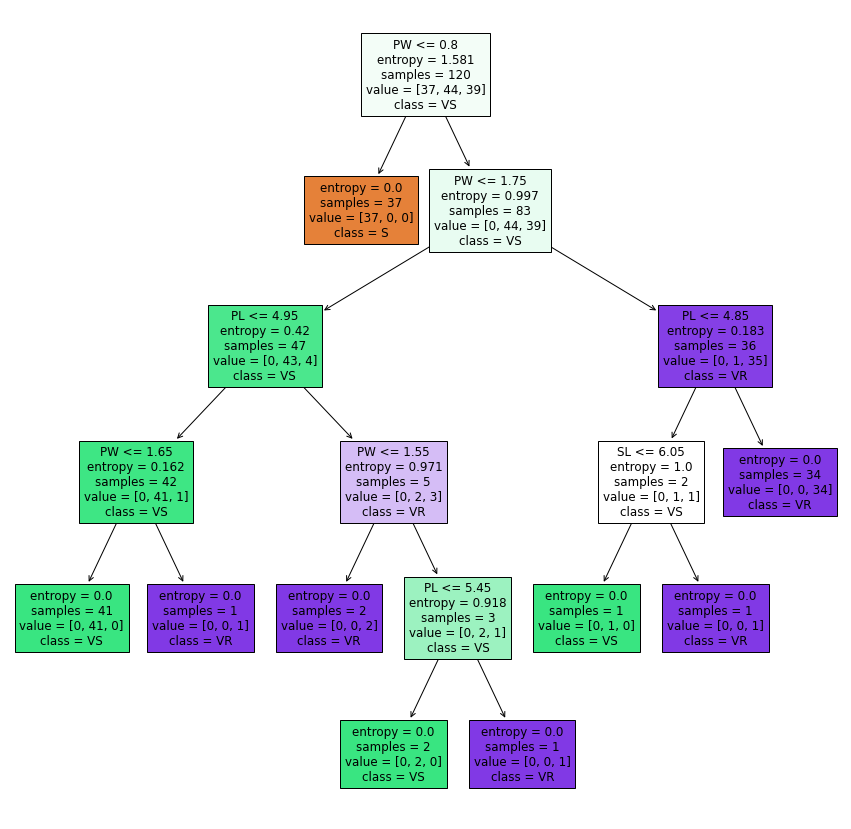

In [43]:
plt.figure(figsize=(15,15))
cols = ['SL', 'SW', 'PL','PW']
cat_names =['S', 'VS', 'VR']
tree.plot_tree(model, 
              feature_names = cols,
              class_names = cat_names,
              filled=True);

In [44]:
-1*((37/120)*np.log2(37/120)  + (44/120)*np.log2(44/120) + (39/120)*np.log2(39/120))

1.5810951599090193

In [ ]:
# pruning the tree - max_depth feature

In [50]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Less depth trees - weak learners

Return the feature importances.

The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.
It is also known as the Gini importance.

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.feature_importances_

array([0.02342261, 0.02924587, 0.0634409 , 0.88389062])

In [ ]:
## Feature Engineeriing - drop one feature at a time

In [55]:
X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(accuracy_score(y_test, yhat))
model.feature_importances_

(150, 1) (150,)
(120, 1) (30, 1) (120,) (30,)
0.9666666666666667


array([1.])

In [56]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)
#Split the Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(accuracy_score(y_test, yhat))

(150, 2) (150,)
(120, 2) (30, 2) (120,) (30,)
0.9333333333333333


In [70]:
# Plot the decision boundary
# Creation of the mesh
pl = np.arange(X_test[:,0].min()-0.2, X_test[:,0].max()+0.2,0.01)
pw = np.arange(X_test[:,1].min()-0.2, X_test[:,1].max()+0.2,0.01)
PL, PW = np.meshgrid(pl,pw)
# Convert2D to 1D and concatenate the 2 arrays
formed_data = np.c_[PL.ravel(), PW.ravel()]
ans = model.predict(formed_data)

In [71]:
# in ans replace setosa with 0, vs with 1, vr with2
mask_setosa = ans == 'setosa'
mask_versicolor = ans == 'versicolor'
mask_virginica = ans == 'virginica'
ans[mask_setosa] = 0
ans[mask_versicolor] = 1
ans[mask_virginica] = 2

In [72]:
ans

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

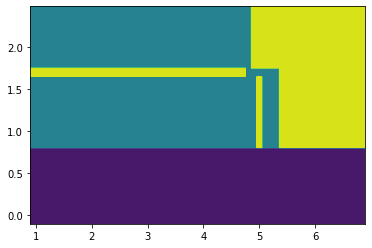

In [73]:
ans = ans.reshape(PL.shape)
plt.contourf(PL, PW, ans)
plt.show()